# Asteroid classification

**Credit: [AITS cainvas](http://cainvas.ai-tech.systems/) authors**

![](https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/asteroid.gif)

Classifying asteroids as hazardous or non-hazardous based on various factors such as speed, distance, mass etc.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix
import random
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# The dataset

The datatset is a CSV file with attributes of asteroids such as distance from earth, velocity, orbit overlap etc that help us identify hazardous from non-hazardous ones.

In [2]:
df = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/nasa.csv')
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


# Data preprocessing

## Data cleaning/Fetaure extraction

In [3]:
# Peek into the columns

df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [4]:
# Understanding the datatypes of the columns

df.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


In [5]:
# What are the contents of the Equinox column?

df['Equinox'].value_counts()

J2000    4687
Name: Equinox, dtype: int64

In [6]:
# Drop unnecessary columns

df = df.drop(columns = ['Neo Reference ID', 'Name', 'Equinox', 'Close Approach Date', 'Orbit Determination Date', 'Orbiting Body', 'Epoch Date Close Approach'])
df

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,22.154265,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,False
4683,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,3.225150,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,False
4684,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,7.191642,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,False
4685,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,851.187094,11.352090,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,False


In [7]:
# Lets look at the correlation between the various attributes

corr = df.corr()
corr

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Absolute Magnitude,1.000000,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.613482,-0.376853,...,-0.459632,-0.011470,-0.206774,0.086966,0.031784,-0.256169,-0.115855,-0.049401,0.195652,-0.325522
Est Dia in KM(min),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in KM(max),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(min),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(max),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Miles(min),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Miles(max),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Feet(min),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in Feet(max),-0.613482,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.242141,...,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Relative Velocity km per sec,-0.376853,0.242141,0.242141,0.242141,0.242141,0.242141,0.242141,0.242141,0.242141,1.000000,...,0.514657,-0.021301,0.017961,-0.506978,-0.002913,0.144782,0.020006,0.017685,0.022452,0.191970


The same measure of distance and velocities are given in different units of measurement thus making them duplicates.

In [8]:
# There are many column pairs with high correlation, thus acting as duplicates. 
# We can drop a column if there is a correlation > 0.95

final_columns = list(df.columns)    # maintaining a temporary list to remove columns from

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i, j] >= 0.95:    # if very high correlation
            if list(df.columns)[j] in final_columns:    # if not aldready removed
                final_columns.remove(list(df.columns)[j])    # remove

df = df[final_columns]    # selecting only the required columns

df   

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Mean Anomaly,Hazardous
0,21.600,0.127220,6.115834,0.419483,17,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,0.808259,57.257470,264.837533,True
1,21.300,0.146068,18.113985,0.383014,21,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,0.718200,313.091975,173.741112,False
2,20.300,0.231502,7.590711,0.050956,22,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,0.950791,248.415038,292.893654,True
3,27.400,0.008801,11.173874,0.285322,7,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,0.983902,18.707701,68.741007,False
4,21.600,0.127220,9.840831,0.407832,25,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,0.967687,158.263596,135.142133,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,22.154265,0.041361,4,8,0.019777,5.156,2457637.5,0.361512,1.161429,39.880491,164.183305,0.741558,276.395697,304.306025,False
4683,28.200,0.006089,3.225150,0.006469,2,6,0.006451,5.742,2458000.5,0.073200,1.075134,5.360249,345.225230,0.996434,42.111064,282.978786,False
4684,22.700,0.076658,7.191642,0.061009,17,6,0.059973,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,0.965760,274.692712,203.501147,False
4685,21.800,0.116026,11.352090,0.260760,6,5,0.177510,4.477,2458000.5,0.202565,1.486600,21.080244,163.802910,1.185467,180.346090,203.524965,False


The number of columns have reduced a lot!

## Converting to integer categorical variable

In [9]:
# Changin to int (0/1) from bool (False/True)

df['Hazardous'] = df['Hazardous'].astype('int')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Balancing the dataset

In [10]:
# Spread of values in categories

df['Hazardous'].value_counts()

0    3932
1     755
Name: Hazardous, dtype: int64

There is high imbalance.

Here, we resample records from the category with fewer ones to match the higher category count.

In [11]:
# Spltting into one dataframe for each category.
df_h = df[df['Hazardous'] == 1]
df_nh = df[df['Hazardous'] == 0]

# Resampling
df_h = df_h.sample(len(df_nh), replace = True)

# Concatenating the two to form a single dataset
df = df_h.append(df_nh)

# Spread of values in categories
df['Hazardous'].value_counts()

1    3932
0    3932
Name: Hazardous, dtype: int64

## Train test split

In [12]:
# defining the input and output columns to separate the dataset in the later cells.

input_columns = list(df.columns[:-1])
output_columns = [df.columns[-1]]

print("Number of input columns: ", len(input_columns))
#print("Input columns: ", ', '.join(input_columns))

print("Number of output columns: ", len(output_columns))
#print("Output columns: ", ', '.join(output_columns))

Number of input columns:  16
Number of output columns:  1


In [13]:
# Splitting into train, val and test set -- 80-10-10 split

# First, an 80-20 split
train_df, val_test_df = train_test_split(df, test_size = 0.2, random_state = 113)

# Then split the 20% into half
val_df, test_df = train_test_split(val_test_df, test_size = 0.5, random_state = 113)

print("Number of samples in...")
print("Training set: ", len(train_df))
print("Validation set: ", len(val_df))
print("Testing set: ", len(test_df))

Number of samples in...
Training set:  6291
Validation set:  786
Testing set:  787


In [14]:
# Splitting into X (input) and y (output)

Xtrain, ytrain = np.array(train_df[input_columns]), np.array(train_df[output_columns])

Xval, yval = np.array(val_df[input_columns]), np.array(val_df[output_columns])

Xtest, ytest = np.array(test_df[input_columns]), np.array(test_df[output_columns])

## Scaling

In [15]:
# Each feature has a different range. 
# Using min_max_scaler to scale them to values in the range [0,1].

min_max_scaler = MinMaxScaler()

# Fit on training set alone
Xtrain = min_max_scaler.fit_transform(Xtrain)

# Use it to transform val and test input
Xval = min_max_scaler.transform(Xval)
Xtest = min_max_scaler.transform(Xtest)

# The model

In [16]:
model = Sequential([
    Dense(256, activation = 'relu', input_shape = Xtrain[0].shape),
    Dense(128, activation = 'relu'),
    Dense(32, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

cb = [EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)]

In [17]:
model.compile(optimizer = Adam(0.001), loss = BinaryCrossentropy(), metrics=['accuracy'])

history = model.fit(Xtrain, ytrain, validation_data = (Xval, yval), epochs = 256, callbacks = cb)

Epoch 1/256
197/197 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8636 - val_loss: 0.2152 - val_accuracy: 0.9173
Epoch 2/256
197/197 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9315 - val_loss: 0.1670 - val_accuracy: 0.9351
Epoch 3/256
197/197 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 0.9439 - val_loss: 0.0943 - val_accuracy: 0.9631
Epoch 4/256
197/197 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9569 - val_loss: 0.0817 - val_accuracy: 0.9720
Epoch 5/256
197/197 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.9630 - val_loss: 0.0987 - val_accuracy: 0.9644
Epoch 6/256
197/197 [==============================] - 0s 2ms/step - loss: 0.0866 - accuracy: 0.9701 - val_loss: 0.0671 - val_accuracy: 0.9758
Epoch 7/256
197/197 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.9652 - val_loss: 0.0605 - val_accuracy: 0.9758

In [18]:
model.evaluate(Xtest, ytest)

25/25 [==============================] - 0s 993us/step - loss: 0.0423 - accuracy: 0.9873


[0.04229162260890007, 0.987293541431427]

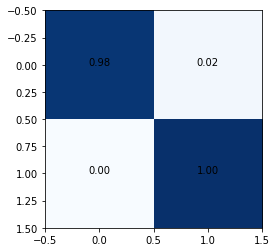

In [19]:
cm = confusion_matrix(ytest, (model.predict(Xtest)>0.5).astype('int'))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[1]):
    for j in range(cm.shape[0]):
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="black")


plt.imshow(cm, cmap=plt.cm.Blues)

It is important to avoid false negatives (cell [1, 0] in matrix) in this type of problems. False negative is the classifiction of a hazardous asteroid as non-hazardous. A larger training set will help.

# Plotting the metrics

In [20]:
def plot(history, variable, variable1):
    plt.plot(range(len(history[variable])), history[variable])
    plt.plot(range(len(history[variable1])), history[variable1])
    plt.title(variable)
    plt.legend([variable, variable1])

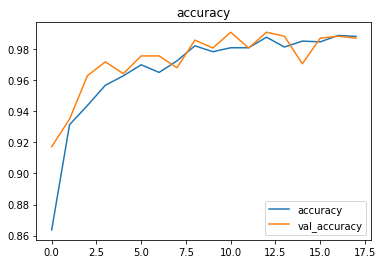

In [21]:
plot(history.history, "accuracy", "val_accuracy")

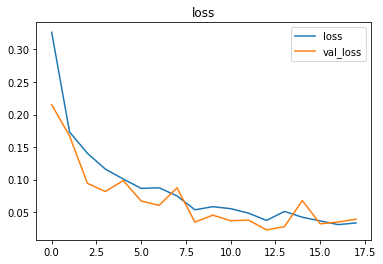

In [22]:
plot(history.history, "loss", "val_loss")

# Prediction

In [23]:
# Defining output labels in accoudance with their array indices.

output_labels = ['Non-hazardous', 'Hazardous']

In [24]:
# Pick random test sample
i = random.randint(0, len(test_df)-1)

model_output = model.predict(Xtest[i].reshape(1, -1))[0][0]
pred = (model_output>0.5).astype('int')

# show predicted output
print ("\nModel predicted : ", output_labels[pred], "(", model_output, "-->", pred, ")")

# actual output
print("Actual asteroid type : ", output_labels[ytest[i][0]])


Model predicted :  Hazardous ( 0.98175174 --> 1 )
Actual asteroid type :  Hazardous


# deepC

In [25]:
model.save('asteroid.h5')

!deepCC asteroid.h5

[INFO]
Reading [keras model] 'asteroid.h5'
[SUCCESS]
Saved 'asteroid.onnx'
[INFO]
Reading [onnx model] 'asteroid.onnx'
[INFO]
Model info:
  ir_vesion : 4
  doc       : 
[WARNING]
[ONNX]: terminal (input/output) dense_input's shape is less than 1. Changing it to 1.
[WARNING]
[ONNX]: terminal (input/output) dense_3's shape is less than 1. Changing it to 1.
WARN (GRAPH): found operator node with the same name (dense_3) as io node.
[INFO]
Running DNNC graph sanity check ...
[SUCCESS]
Passed sanity check.
[INFO]
Writing C++ file 'asteroid_deepC/asteroid.cpp'
[INFO]
deepSea model files are ready in 'asteroid_deepC/' 
[RUNNING COMMAND]
g++ -std=c++11 -O3 -fno-rtti -fno-exceptions -I. -I/opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/include -isystem /opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/packages/eigen-eigen-323c052e1731 asteroid_deepC/asteroid.cpp -o asteroid_deepC/asteroid.exe
[RUNNING COMMAND]
size "asteroid_dee

In [26]:
# Pick random test sample
i = random.randint(0, len(test_df)-1)

np.savetxt('sample.data', Xtest[i])

# run exe with input
!asteroid_deepC/asteroid.exe sample.data

# show predicted output
nn_out = np.loadtxt('deepSea_result_1.out')
pred = (nn_out>0.5).astype('int')
print ("\nModel predicted : ",  output_labels[pred], "(", nn_out, "-->", pred, ")")

# actual output
print("Actual asteroid type : ", output_labels[ytest[i][0]])

reading file sample.data.
writing file deepSea_result_1.out.

Model predicted :  Hazardous ( 0.999619 --> 1 )
Actual asteroid type :  Hazardous
